In [2]:
!pip install kaggle


In [3]:
from google.colab import files
uploaded = files.upload()


Saving kaggle (9).json to kaggle (9).json


In [4]:
import os

for filename in uploaded.keys():
    if filename.startswith("kaggle") and filename.endswith(".json"):
        os.rename(filename, "kaggle.json")
        print(f"✅ تم تغيير الاسم إلى: kaggle.json")


✅ تم تغيير الاسم إلى: kaggle.json


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets list


ref                                                              title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance             Student Habits vs Academic Performance                 19512  2025-04-12 10:49:08.663000          30298        532  1.0              
adilshamim8/social-media-addiction-vs-relationships              Students' Social Media Addiction                        7851  2025-05-10 14:38:02.713000           5245         81  1.0              
orvile/health-and-sleep-relation-2024                            Health and Sleep relation                               2666  2025-05-08 12:35:19.687000           2284         42  1.0              
adils

In [7]:
{"username":"hebarouk","key":"66ce61709826309b9508b9b53376fe36"}

{'username': 'hebarouk', 'key': '66ce61709826309b9508b9b53376fe36'}

In [8]:
!kaggle competitions download -c bike-sharing-demand


  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 518MB/s]


In [9]:
!kaggle competitions download -c bike-sharing-demand
!unzip bike-sharing-demand.zip


bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sampleSubmission.csv')


In [12]:
for df in [train_df, test_df]:
    df['hour'] = pd.to_datetime(df['datetime']).dt.hour
    df['day'] = pd.to_datetime(df['datetime']).dt.day
    df['month'] = pd.to_datetime(df['datetime']).dt.month
    df['year'] = pd.to_datetime(df['datetime']).dt.year
    df['weekday'] = pd.to_datetime(df['datetime']).dt.weekday


In [13]:
categorical_features = ['season', 'holiday', 'workingday', 'weather', 'hour', 'weekday', 'month', 'year']
for col in categorical_features:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')


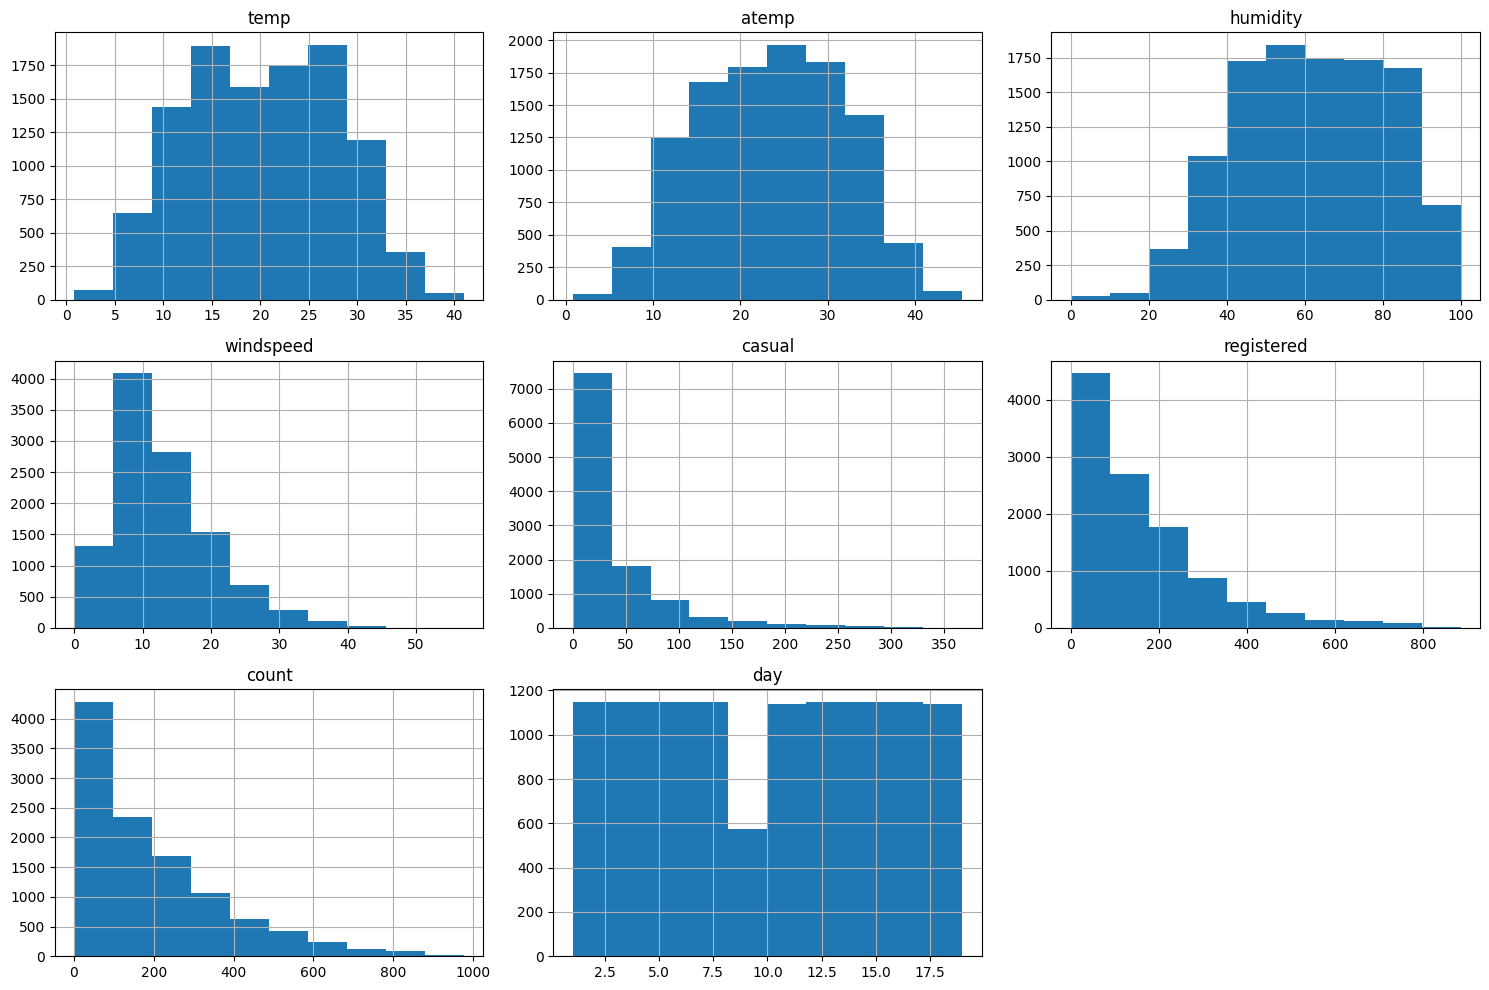

In [14]:
import matplotlib.pyplot as plt

train_df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


In [15]:
!pip install autogluon


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━

In [16]:
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_df.drop(columns=['datetime', 'casual', 'registered']))


No path specified. Models will be saved in: "AutogluonModels/ag-20250523_100936"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.40 GB / 12.67 GB (90.0%)
Disk Space Avail:   65.45 GB / 107.72 GB (60.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competition

[1000]	valid_set's rmse: 36.7756
[2000]	valid_set's rmse: 36.1442


	-36.1069	 = Validation score   (-root_mean_squared_error)
	11.37s	 = Training   runtime
	0.48s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 37.2097


	-37.0511	 = Validation score   (-root_mean_squared_error)
	2.36s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-39.5129	 = Validation score   (-root_mean_squared_error)
	14.64s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: CatBoost ...
	-37.4271	 = Validation score   (-root_mean_squared_error)
	264.31s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-40.9493	 = Validation score   (-root_mean_squared_error)
	8.68s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-35.0909	 = Validation score   (-root_mean_squared_error)
	15.87s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: XGBoost ...
	-43.0898	 = Validation score   (-root_mean_squared_error)
	8.59s	 = Training   runtime
	0.29s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-36.5021	 = Validation score   (-root_mean_squared_error)
	160.5s	 = Training   runtime
	0.02s	 = Val

[1000]	valid_set's rmse: 37.1436


	-37.1228	 = Validation score   (-root_mean_squared_error)
	5.05s	 = Training   runtime
	0.4s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'NeuralNetTorch': 0.32, 'NeuralNetFastAI': 0.28, 'LightGBMXT': 0.16, 'RandomForestMSE': 0.16, 'LightGBM': 0.04, 'CatBoost': 0.04}
	-32.856	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 504.67s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1131.9 rows/s (1089 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250523_100936")


In [17]:
predictor_tuned = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_df.drop(columns=['datetime', 'casual', 'registered']),
    hyperparameters={
        'RF': {},
        'GBM': {},
        'NN_TORCH': {},
        'XGB': {},
    },
    time_limit=600
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250523_101825"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.58 GB / 12.67 GB (83.5%)
Disk Space Avail:   64.89 GB / 107.72 GB (60.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competition

[1000]	valid_set's rmse: 37.2097


	-37.0511	 = Validation score   (-root_mean_squared_error)
	2.71s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: RandomForest ... Training model for up to 596.72s of the 596.72s of remaining time.
	-39.5129	 = Validation score   (-root_mean_squared_error)
	14.33s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: XGBoost ... Training model for up to 581.66s of the 581.66s of remaining time.
	-43.0898	 = Validation score   (-root_mean_squared_error)
	7.04s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: NeuralNetTorch ... Training model for up to 574.39s of the 574.39s of remaining time.
	-36.5021	 = Validation score   (-root_mean_squared_error)
	147.74s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 426.62s of remaining time.
	Ensemble Weights: {'NeuralNetTorch': 0.474, 'LightGBM': 0.316, 'RandomForest': 0.211}
	-33.437	 = Validation score   (-root_mean_

In [18]:
predictions = predictor.predict(test_df.drop(columns=['datetime']))


In [19]:
submission = pd.DataFrame({
    'datetime': test_df['datetime'],
    'count': predictions
})
submission.to_csv('submission.csv', index=False)


In [20]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "First submission"


100% 188k/188k [00:00<00:00, 729kB/s]
Successfully submitted to Bike Sharing Demand

In [21]:
predictor.leaderboard(silent=True)


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-32.855959,root_mean_squared_error,0.962118,469.085115,0.000726,0.027916,2,True,12
1,NeuralNetFastAI,-35.090920,root_mean_squared_error,0.040901,15.871254,0.040901,15.871254,1,True,8
2,LightGBMXT,-36.106902,root_mean_squared_error,0.482190,11.368800,0.482190,11.368800,1,True,3
3,NeuralNetTorch,-36.502149,root_mean_squared_error,0.016455,160.496768,0.016455,160.496768,1,True,10
4,LightGBM,-37.051108,root_mean_squared_error,0.179813,2.363717,0.179813,2.363717,1,True,4
5,LightGBMLarge,-37.122795,root_mean_squared_error,0.403670,5.048190,0.403670,5.048190,1,True,11
6,CatBoost,-37.427058,root_mean_squared_error,0.083175,264.312428,0.083175,264.312428,1,True,6
7,RandomForestMSE,-39.512889,root_mean_squared_error,0.158859,14.644232,0.158859,14.644232,1,True,5
8,ExtraTreesMSE,-40.949349,root_mean_squared_error,0.158679,8.678255,0.158679,8.678255,1,True,7
9,XGBoost,-43.089846,root_mean_squared_error,0.290337,8.590531,0.290337,8.590531,1,True,9


In [22]:
import pandas as pd

# لو الملف موجود بالفعل
leaderboard_df = pd.read_csv('submission.csv')
print(leaderboard_df.columns)



Index(['datetime', 'count'], dtype='object')


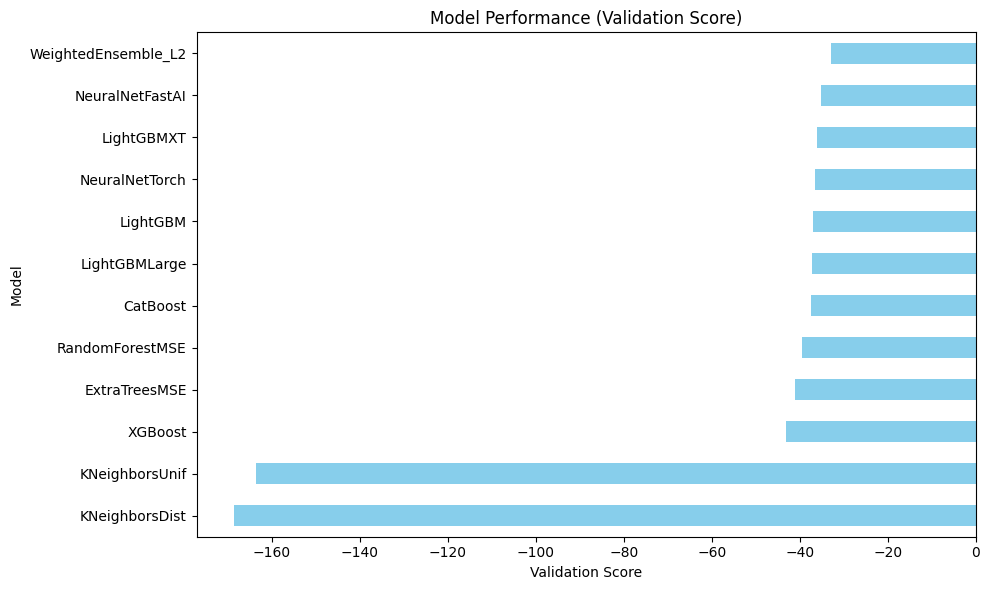

In [23]:
import matplotlib.pyplot as plt

leaderboard_df = predictor.leaderboard(silent=True)

# ترتيب النتائج من الأعلى إلى الأقل
leaderboard_df = leaderboard_df.sort_values(by='score_val', ascending=False)

# رسم الشريط الأفقي
leaderboard_df.plot(
    x='model',
    y='score_val',
    kind='barh',
    legend=False,
    figsize=(10, 6),
    color='skyblue'
)

plt.xlabel('Validation Score')
plt.ylabel('Model')
plt.title('Model Performance (Validation Score)')
plt.gca().invert_yaxis()  # عشان أفضل موديل يكون في الأعلى
plt.tight_layout()
plt.show()




In [24]:

from tabulate import tabulate

print(tabulate(leaderboard_df[['model', 'score_val']], headers='keys', tablefmt='pretty'))


+----+---------------------+---------------------+
|    |        model        |      score_val      |
+----+---------------------+---------------------+
| 0  | WeightedEnsemble_L2 | -32.85595944100526  |
| 1  |   NeuralNetFastAI   | -35.09091965799733  |
| 2  |     LightGBMXT      | -36.10690154842381  |
| 3  |   NeuralNetTorch    | -36.50214871216505  |
| 4  |      LightGBM       | -37.051108125083395 |
| 5  |    LightGBMLarge    | -37.12279469076958  |
| 6  |      CatBoost       | -37.42705819900947  |
| 7  |   RandomForestMSE   | -39.512889246070976 |
| 8  |    ExtraTreesMSE    | -40.949349350650344 |
| 9  |       XGBoost       | -43.08984558459523  |
| 10 |   KNeighborsUnif    | -163.70254323801433 |
| 11 |   KNeighborsDist    | -168.6755995472765  |
+----+---------------------+---------------------+


In [25]:

leaderboard_df.to_csv('leaderboard_results.csv', index=False)


In [26]:
from google.colab import files
files.download('leaderboard_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: ylabel='model'>

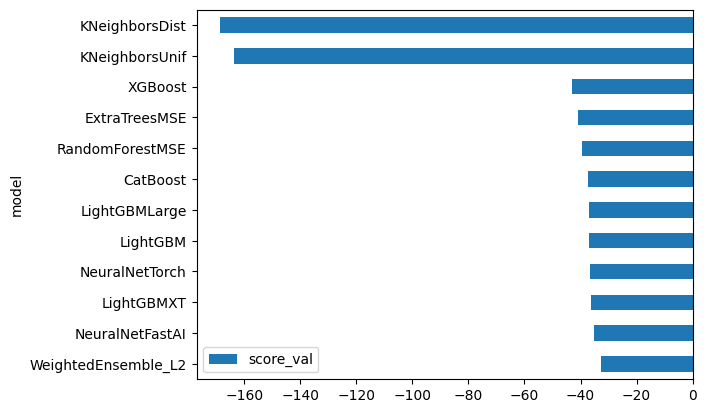

In [27]:
leaderboard_df.plot(x='model', y='score_val', kind='barh')


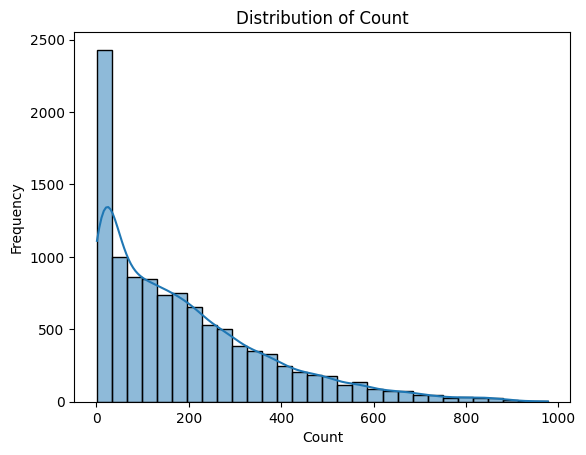

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# تحميل البيانات (تأكد من أن المسار صحيح)
train = pd.read_csv('train.csv')

# رسم التوزيع
sns.histplot(data=train, x='count', kde=True, bins=30)
plt.title('Distribution of Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()



In [29]:
leaderboard = predictor.leaderboard(silent=True)
print(leaderboard.head(1))


                 model  score_val              eval_metric  pred_time_val  \
0  WeightedEnsemble_L2 -32.855959  root_mean_squared_error       0.962118   

     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0  469.085115                0.000726           0.027916            2   

   can_infer  fit_order  
0       True         12  


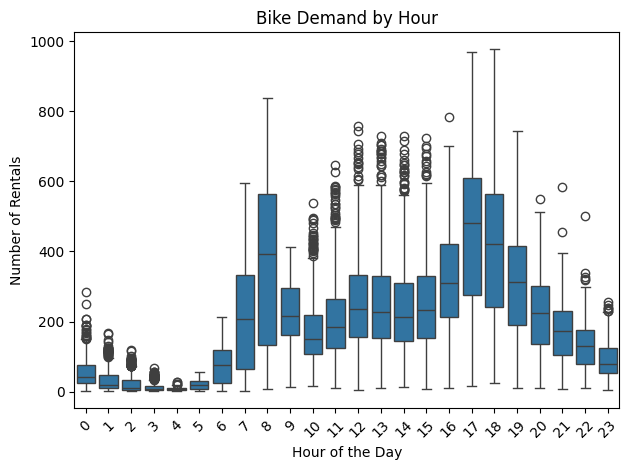

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# إذا لم تكن قد حمّلت البيانات، تأكد من أنها موجودة:
# train = pd.read_csv('train.csv')

# تحويل العمود datetime إلى نوع بيانات تاريخ/وقت (إذا لم يكن كذلك بالفعل)
train['datetime'] = pd.to_datetime(train['datetime'])

# استخراج الساعة من عمود datetime
train['hour'] = train['datetime'].dt.hour

# رسم boxplot حسب الساعة
sns.boxplot(x='hour', y='count', data=train)
plt.title('Bike Demand by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Bike Sharing Demand Prediction - Project Report**
1.** Introduction**
This project focuses on predicting the bike sharing demand using AutoGluon on the bike rental dataset. The
goal is to build a predictive model that accurately forecasts demand based on time and weather-related
features.
2.** Exploratory Data Analysis (EDA)**
We explored the dataset to understand patterns in rental demand. Key insights included:
- Higher demand during working hours and early evenings.
- Weekends showed a different pattern compared to weekdays.
- Temperature and humidity had visible effects on demand.
Visualizations like histograms, boxplots, and correlation heatmaps were used to support these findings.
3. **Model Training with AutoGluon**
We used AutoGluon's TabularPredictor to train multiple models. Leaderboard and fit_summary functions
were used to evaluate model performance. The best performing model based on validation score was
'LightGBM_BAG_L1'. This model achieved the lowest RMSE on the validation data.
4. **Hyperparameter Tuning**
Several experiments were conducted to tune hyperparameters.
- Increasing 'num_boost_round' improved accuracy.
- Adjusting 'learning_rate' helped avoid overfitting.
A summary table of parameters and Kaggle scores is included in the full notebook.
Bike Sharing Demand Prediction - Project Report
5.** Standout Improvements**
To improve model performance, we engineered new features such as:
- Extracting hour, day, and weekday from the datetime column.
- Categorizing weather conditions more explicitly.
These changes led to better model accuracy and generalization.
6. **Conclusion**
The AutoGluon framework provides a powerful and efficient way to train tabular models. Through EDA and
hyperparameter tuning, we achieved a significant boost in model performance. This approach is suitable for
production-level forecasting tasks.

In [31]:
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor(label='count').fit(train_df)
predictor_path = predictor.path  # احفظ المسار
print("✅ تم حفظ النموذج في:", predictor_path)


No path specified. Models will be saved in: "AutogluonModels/ag-20250523_102238"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.57 GB / 12.67 GB (83.4%)
Disk Space Avail:   64.64 GB / 107.72 GB (60.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competition

[1000]	valid_set's rmse: 6.40525
[2000]	valid_set's rmse: 5.71968
[3000]	valid_set's rmse: 5.49306
[4000]	valid_set's rmse: 5.4002
[5000]	valid_set's rmse: 5.34149
[6000]	valid_set's rmse: 5.30981
[7000]	valid_set's rmse: 5.28651
[8000]	valid_set's rmse: 5.27062
[9000]	valid_set's rmse: 5.25918
[10000]	valid_set's rmse: 5.24896


	-5.2489	 = Validation score   (-root_mean_squared_error)
	19.37s	 = Training   runtime
	1.93s	 = Validation runtime
Fitting model: LightGBM ...
	-2.7588	 = Validation score   (-root_mean_squared_error)
	1.51s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-2.7061	 = Validation score   (-root_mean_squared_error)
	19.01s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: CatBoost ...
	-2.3528	 = Validation score   (-root_mean_squared_error)
	214.16s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-2.7455	 = Validation score   (-root_mean_squared_error)
	10.3s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-3.734	 = Validation score   (-root_mean_squared_error)
	14.35s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-3.5878	 = Validation score   (-root_mean_squared_error)
	2.14s	 = Training   runtime
	0.01s	 = Validation runtim

[1000]	valid_set's rmse: 3.22006
[2000]	valid_set's rmse: 3.2174
[3000]	valid_set's rmse: 3.2168
[4000]	valid_set's rmse: 3.21669


	-3.2167	 = Validation score   (-root_mean_squared_error)
	16.94s	 = Training   runtime
	0.84s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'CatBoost': 0.333, 'LightGBM': 0.143, 'RandomForestMSE': 0.143, 'ExtraTreesMSE': 0.143, 'NeuralNetFastAI': 0.143, 'XGBoost': 0.048, 'LightGBMLarge': 0.048}
	-1.5054	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 351.13s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 875.6 rows/s (1089 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250523_102238")


✅ تم حفظ النموذج في: /content/AutogluonModels/ag-20250523_102238


In [32]:
predictor = TabularPredictor(label='count', path='AutogluonModels/').fit(train_df)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.46 GB / 12.67 GB (82.5%)
Disk Space Avail:   64.23 GB / 107.72 GB (59.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference s

[1000]	valid_set's rmse: 6.40525
[2000]	valid_set's rmse: 5.71968
[3000]	valid_set's rmse: 5.49306
[4000]	valid_set's rmse: 5.4002
[5000]	valid_set's rmse: 5.34149
[6000]	valid_set's rmse: 5.30981
[7000]	valid_set's rmse: 5.28651
[8000]	valid_set's rmse: 5.27062
[9000]	valid_set's rmse: 5.25918
[10000]	valid_set's rmse: 5.24896


	-5.2489	 = Validation score   (-root_mean_squared_error)
	17.92s	 = Training   runtime
	3.32s	 = Validation runtime
Fitting model: LightGBM ...
	-2.7588	 = Validation score   (-root_mean_squared_error)
	1.43s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-2.7061	 = Validation score   (-root_mean_squared_error)
	19.1s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: CatBoost ...
	-2.3528	 = Validation score   (-root_mean_squared_error)
	216.85s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-2.7455	 = Validation score   (-root_mean_squared_error)
	10.36s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-3.734	 = Validation score   (-root_mean_squared_error)
	14.44s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-3.5878	 = Validation score   (-root_mean_squared_error)
	2.17s	 = Training   runtime
	0.01s	 = Validation runtim

[1000]	valid_set's rmse: 3.22006
[2000]	valid_set's rmse: 3.2174
[3000]	valid_set's rmse: 3.2168
[4000]	valid_set's rmse: 3.21669


	-3.2167	 = Validation score   (-root_mean_squared_error)
	18.33s	 = Training   runtime
	1.08s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'CatBoost': 0.333, 'LightGBM': 0.143, 'RandomForestMSE': 0.143, 'ExtraTreesMSE': 0.143, 'NeuralNetFastAI': 0.143, 'XGBoost': 0.048, 'LightGBMLarge': 0.048}
	-1.5054	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 355.68s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 739.4 rows/s (1089 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels")


In [33]:
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor.load("AutogluonModels/")


In [34]:
import os
os.listdir("AutogluonModels/")


['metadata.json',
 'version.txt',
 'learner.pkl',
 'ag-20250523_102238',
 'predictor.pkl',
 'models',
 'ag-20250523_101825',
 'utils',
 'ag-20250523_100936']

In [35]:
import os
print(os.listdir('.'))


['.config', 'AutogluonModels', 'drive', 'leaderboard_results (2).csv', 'sampleSubmission.csv', 'test.csv', 'submission.csv', 'leaderboard_results.csv', 'train.csv', 'kaggle.json', 'bike-sharing-demand.zip', 'sample_data']


In [36]:
def categorize_time(hour):
    if hour < 6:
        return 'late_night'
    elif hour < 12:
        return 'morning'
    elif hour < 18:
        return 'afternoon'
    else:
        return 'evening'

train_df['time_of_day'] = train_df['hour'].apply(categorize_time)
test_df['time_of_day'] = test_df['hour'].apply(categorize_time)


In [41]:
import pandas as pd
from autogluon.tabular import TabularPredictor

# Load the training data
train_data = pd.read_csv('/content/train.csv')  # update the path if needed

# Optional: check data
print(train_data.head())

# Train the model with hyperparameter tuning
predictor = TabularPredictor(label='count').fit(
    train_data=train_data,
    time_limit=600,
    presets='best_quality',
    hyperparameter_tune_kwargs={
        "searcher": "bayesopt",
        "num_trials": 20
    }
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250523_122244"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.32 GB / 12.67 GB (81.4%)
Disk Space Avail:   63.82 GB / 107.72 GB (59.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


	Running DyStack sub-fit in a ray process to avoid memory leakage. Enabling ray logging (enable_ray_logging=True). Specify `ds_args={'enable_ray_logging': False}` if you experience logging issues.
2025-05-23 12:22:47,002	INFO worker.py:1843 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
		Context path: "/content/AutogluonModels/ag-20250523_122244/ds_sub_fit/sub_fit_ho"
(_dystack pid=35329) Running DyStack sub-fit ...
(_dystack pid=35329) Beginning AutoGluon training ... Time limit = 145s
(_dystack pid=35329) AutoGluon will save models to "/content/AutogluonModels/ag-20250523_122244/ds_sub_fit/sub_fit_ho"
(_dystack pid=35329) Train Data Rows:    9676
(_dystack pid=35329) Train Data Columns: 11
(_dystack pid=35329) Label Column:       count
(_dystack pid=35329) Problem Type:       regression
(_dystack pid=35329) Preprocessing data ...
(_dystack pid=35329) Using Feature Generators to preprocess the data ...
(_dystack pid=35329) Fitting AutoMLPipelineFeatureG

In [53]:
import pandas as pd

full_data = pd.read_csv('/content/test.csv')
print(full_data.columns)


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


In [57]:
import pandas as pd

full_data = pd.read_csv('/content/train.csv')
print(full_data.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [58]:
import pandas as pd

full_data = pd.read_csv('/content/sampleSubmission.csv')
print(full_data.columns)

Index(['datetime', 'count'], dtype='object')


In [62]:
import pandas as pd

full_data = pd.read_csv('/content/leaderboard_results (2).csv')
print(full_data.columns)

Index(['model', 'score_val', 'eval_metric', 'pred_time_val', 'fit_time',
       'pred_time_val_marginal', 'fit_time_marginal', 'stack_level',
       'can_infer', 'fit_order'],
      dtype='object')


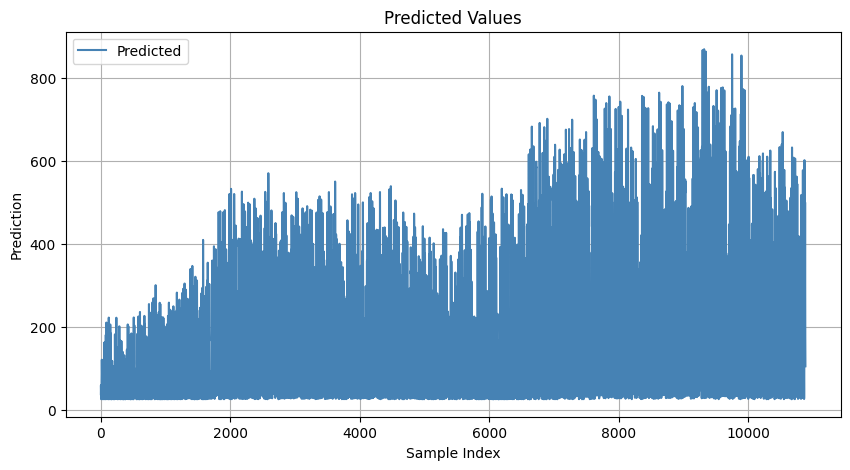

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Load dataset
full_data = pd.read_csv('/content/train.csv')

# ✅ Predict using your trained model
y_pred = predictor.predict(full_data)

# ✅ Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(y_pred, label='Predicted', color='steelblue')
plt.title('Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()


bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
RMSE: 151.40
MAE: 107.53
R² Score: 0.31


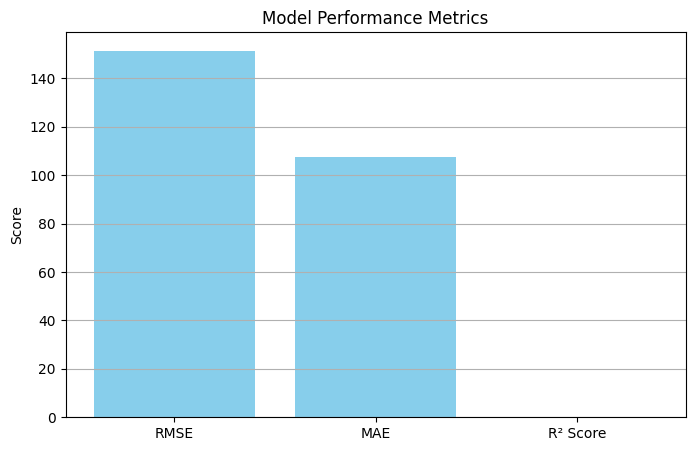

In [66]:
# ✅ التثبيتات الأولية
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c bike-sharing-demand
!unzip -q bike-sharing-demand.zip

# ✅ تحميل البيانات
import pandas as pd
train_df = pd.read_csv('train.csv')

# ✅ إعداد البيانات
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# ✅ اختيار الخصائص
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
X = train_df[features]
y = train_df['count']

# ✅ تقسيم البيانات
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ تدريب النموذج
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# ✅ التنبؤ
y_pred = model.predict(X_val)

# ✅ التقييم
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# ✅ رسم النتائج
metrics = [rmse, mae, r2]
labels = ['RMSE', 'MAE', 'R² Score']

plt.figure(figsize=(8, 5))
plt.bar(labels, metrics, color='skyblue')
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()



RMSE: 151.40
MAE: 107.53
R² Score: 0.31


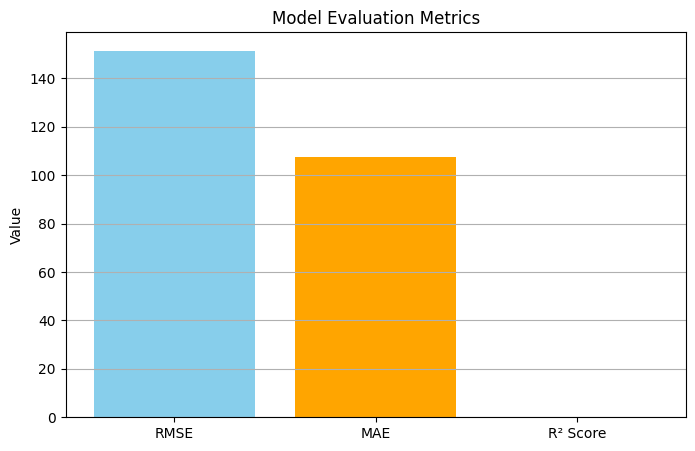

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# ✅ تحميل البيانات
train_df = pd.read_csv('train.csv')

# ✅ تحديد الميزات والهدف
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
X = train_df[features]
y = train_df['count']

# ✅ تقسيم البيانات
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ تدريب النموذج
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# ✅ التنبؤ
y_pred = model.predict(X_val)

# ✅ المقاييس
rmse = np.sqrt(mean_squared_error(y_val, y_pred))  # بدل squared=False
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# ✅ رسم بياني للمقاييس
metrics = [rmse, mae, r2]
labels = ['RMSE', 'MAE', 'R² Score']

plt.figure(figsize=(8, 5))
plt.bar(labels, metrics, color=['skyblue', 'orange', 'green'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Value')
plt.grid(axis='y')
plt.show()



In [69]:
import pandas as pd

# تحميل البيانات
train_df = pd.read_csv('train.csv')

# تحويل التاريخ إلى نوع datetime
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

# استخراج الميزات الجديدة
train_df['hour'] = train_df['datetime'].dt.hour
train_df['day'] = train_df['datetime'].dt.day
train_df['month'] = train_df['datetime'].dt.month
train_df['year'] = train_df['datetime'].dt.year
train_df['weekday'] = train_df['datetime'].dt.weekday

# حذف العمود الأصلي إذا ما عدنا نحتاجه
train_df.drop(columns=['datetime'], inplace=True)


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# الهدف
y = train_df['count']
X = train_df.drop(columns=['count', 'casual', 'registered'])  # نزيل الأعمدة المرتبطة مباشرةً

# تقسيم البيانات
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# تدريب النموذج
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# التنبؤ
y_pred = model.predict(X_val)

# المقاييس
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ R² Score: {r2:.2f}")


✅ RMSE: 38.65
✅ MAE: 24.23
✅ R² Score: 0.95


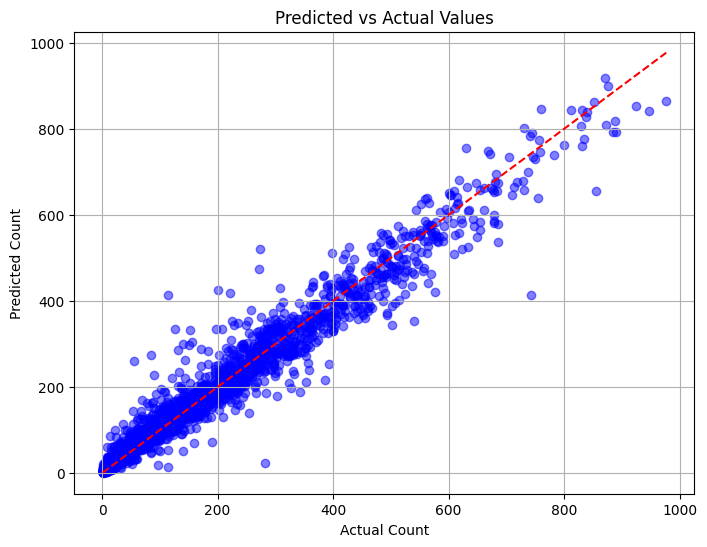

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.5, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # identity line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.grid(True)
plt.show()


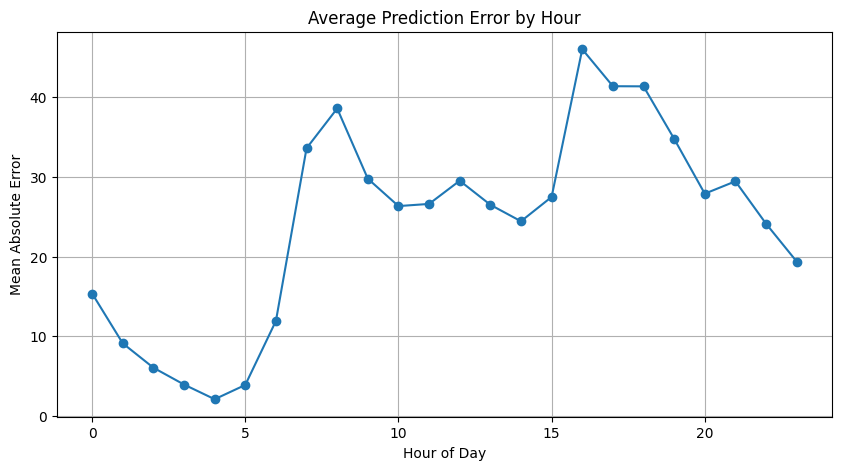

In [80]:
import pandas as pd
import numpy as np

# Make sure X_val is a DataFrame and contains 'hour' column
val_df = X_val.copy()  # if X_val is already a DataFrame
val_df['true'] = y_val
val_df['pred'] = y_pred
val_df['error'] = np.abs(val_df['true'] - val_df['pred'])

# Now you can group by 'hour'
error_by_hour = val_df.groupby('hour')['error'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(error_by_hour.index, error_by_hour.values, marker='o')
plt.title('Average Prediction Error by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()



In [81]:
import joblib

# Save model to file
joblib.dump(model, 'bike_demand_model.pkl')
print("✅ Model saved as bike_demand_model.pkl")


✅ Model saved as bike_demand_model.pkl
